# Linear Regression in Scikit-Learn

This notebook builds linear regression ML models in Scikit Learn using the California housing dataset. It demostrates how to prepare data, fit models, make predictions, and evaluate those predictions through the Pearson Correlation Coefficient (r) and Mean Squared Error (MSE). It then shows a regularization technique utilizing Ridge regression, providing a model with the best regularization coefficient and an optimized fit.

# Imports

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Models

## a) Reading data

In [2]:
housing = fetch_california_housing()

In [15]:
# Feature matrix
X = housing.data
print('X shape: ', X.shape, '\n') # 20640 samples, 8 features
print('Feature names: ', housing.feature_names) # Column (feature) names
print('Feature values: ', X[0,:], '\n') # Feature values of the first sample

X shape:  (20640, 8) 

Feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Feature values:  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] 



y shape:  (20640,) 

Target names:  ['MedHouseVal']
First 10 values:  [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611] 



(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

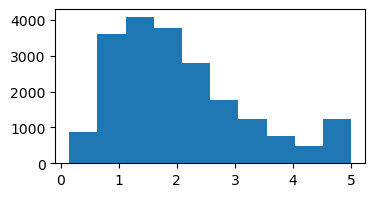

In [14]:
# Target matrix (np array with housing values in units of $100,000)
y = housing.target
print('y shape: ', y.shape,'\n')
print('Target names: ', housing.target_names) # names of target classes
print('First 10 values: ', y[0:10], '\n')

# Examining the target data distribution:
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(y)

In [16]:
# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
# Note: test_size and train_size is between 0.0 to 1.0.
# If None is specified, test_size = 0.25 and train_size = 1- test_size = 0.75.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)

print('X training data shape: ', X_train.shape, '\n', 'X test data shape: ', X_test.shape, '\n')
print('y training data shape: ', y_train.shape, '\n', 'y test data shape: ', y_test.shape)

# Afterwards, one can fit the model with the training set (X_train, y_train),
# and make predictions with the test set (X_test, y_test) for evaluation.

X training data shape:  (16512, 8) 
 X test data shape:  (4128, 8) 

y training data shape:  (16512,) 
 y test data shape:  (4128,)


## b) Linear regression

In [17]:
# sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr = LinearRegression()

# Training the model
lr.fit(X_train, y_train)

# Evaluating model
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

print("Score on training data: ", lr_train_score)
print("Score on test data : ", lr_test_score)

Score on training data:  0.6083741964648377
Score on test data :  0.5965968374812283


## c) Predictions

In [18]:
y_pred = lr.predict(X_test)
print("Predicted y array: ", y_pred)

Predicted y array:  [2.12567705 0.93977118 2.70887192 ... 2.9460839  2.63875476 1.46985176]


In [20]:
# Pearson correlation coefficient
#y_r = r_regression(X_test, y_pred)
y_r, _ = pearsonr(y_test, y_pred)
print("Pearson correlation coefficient (r): ", y_r)

# Mean squared error (MSE)
y_mse = mean_squared_error(y_test, y_pred)
print("Mean squared error (MSE): ", y_mse)

Pearson correlation coefficient (r):  0.773347092828669
Mean squared error (MSE):  0.52914023453974


## d) Scatter plot

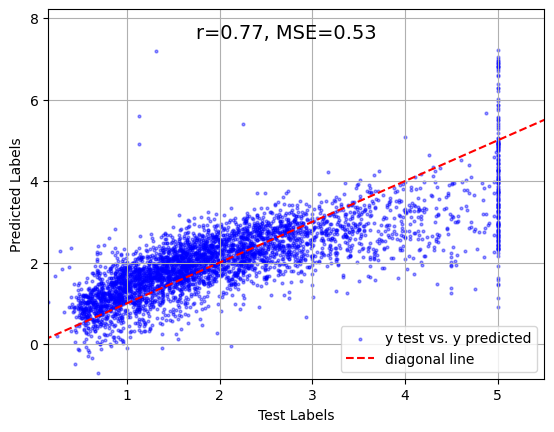

In [43]:
# Plotting r and MSE
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, color='blue', label='y test vs. y predicted', alpha=0.4, s=4)
#ax.plot(x, y2, c='purple', label="y'(x)")
ax.plot(np.linspace(0, len(y_test), len(y_test)), np.linspace(0, len(y_pred), len(y_pred)), color='r', ls='--', label='diagonal line')
ax.set_xlim(min(y_test), max(y_test)+0.5)
ax.set_ylim(min(y_test)-1, max(y_pred)+1)

ax.set_xlabel("Test Labels")
ax.set_ylabel("Predicted Labels")
ax.text(1.75, 7.5, f'r={y_r:.2f}, MSE={y_mse:.2f}', fontsize=14)

ax.legend()
ax.grid(True)
plt.show()

## e) Intercept and coefficients

In [44]:
y_int = lr.intercept_
y_coef = lr.coef_

print("Intercept: ", y_int)
print("Coefficients: ", y_coef)
print('Feature names: ', housing.feature_names)

Intercept:  -37.5157541598365
Coefficients:  [ 4.38565392e-01  9.68722037e-03 -1.04705005e-01  6.32189474e-01
 -3.67690711e-06 -3.44771323e-03 -4.25964056e-01 -4.40601114e-01]
Feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


1) Most important feature: Average Bedrooms (0.632) <br>
2) Median Income (0.439) <br>
3) House Age (0.00969)

# 1) Regularization in Linear Models

## a) Splitting data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print('X training data shape: ', X_train.shape, '\n', 'X test data shape: ', X_test.shape, '\n', 'X validation data shape: ', X_val.shape, '\n')
print('y training data shape: ', y_train.shape, '\n', 'y test data shape: ', y_test.shape, '\n', 'y validation data shape: ', y_val.shape)

X training data shape:  (12384, 8) 
 X test data shape:  (4128, 8) 
 X validation data shape:  (4128, 8) 

y training data shape:  (12384,) 
 y test data shape:  (4128,) 
 y validation data shape:  (4128,)


## b) Ridge model

In [60]:
# sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, 
        # tol=0.0001, solver='auto', positive=False, random_state=None)

#alpha_values = [0.01, 10**(-1.5), 0.1, 10**(-0.5), 1, 10**(0.5), 10]
alpha_values = np.logspace(-2, 1, 7) # 7 steps between 10e-2 and 10e1
ridge_values = []
validation_scores = {} # Using a dictionary to link validation scores to alpha values

for alpha in alpha_values:
    lr = Ridge(alpha = alpha)
    lr.fit(X_train, y_train)
    ridge_values.append(np.sum(lr.coef_**2))
    
    y_val_pred = lr.predict(X_val)
    validation_scores[alpha] = r2_score(y_val, y_val_pred) 

print("Ridge values: ", ridge_values)
print("Validation scores: ", validation_scores)

Ridge values:  [0.9179997497878547, 0.9179591490377108, 0.9178307950783382, 0.9174252727202385, 0.9161465721510791, 0.9121393498584103, 0.8998203921843386]
Validation scores:  {0.01: 0.6182075404884189, 0.03162277660168379: 0.6182072454844743, 0.1: 0.6182063124852137, 0.31622776601683794: 0.6182033609362636, 1.0: 0.618194015936389, 3.1622776601683795: 0.6181643531155726, 10.0: 0.6180695132176344}


## c) Computing validation scores

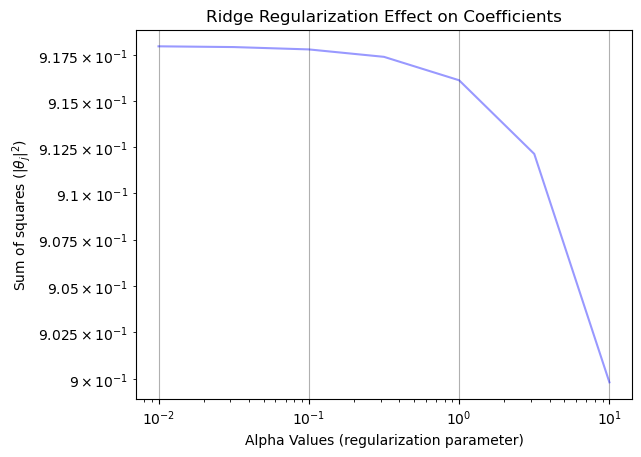

In [58]:
fig, ax = plt.subplots()

plt.loglog(alpha_values, ridge_values, color='blue', label='Ridge values vs. Alpha values', alpha=0.4)

plt.title('Ridge Regularization Effect on Coefficients')
ax.set_xlabel("Alpha Values (regularization parameter)")
ax.set_ylabel('Sum of squares ($|θ_j|^2)$')
ax.grid(True)
plt.show()

## d) New predictions

In [61]:
# Finding the alpha value that yielded the highest validation score
best_alpha = max(validation_scores, key=validation_scores.get)
lr = Ridge(alpha=best_alpha)
lr.fit(X_train, y_train)

# Predictions from the best linear regression model
y_pred = lr.predict(X_test)
print('Predicted y array: ', y_pred)

Predicted y array:  [2.11867064 0.94614001 2.7077087  ... 2.93948582 2.63403705 1.479886  ]


In [63]:
# Pearson correlation coefficient
y_r, _ = pearsonr(y_test, y_pred)
print("Pearson correlation coefficient (r): ", y_r)

# Mean squared error (MSE)
y_mse = mean_squared_error(y_test, y_pred)
print("Mean squared error (MSE): ", y_mse)

Pearson correlation coefficient (r):  0.7731505443913542
Mean squared error (MSE):  0.5294916497468612


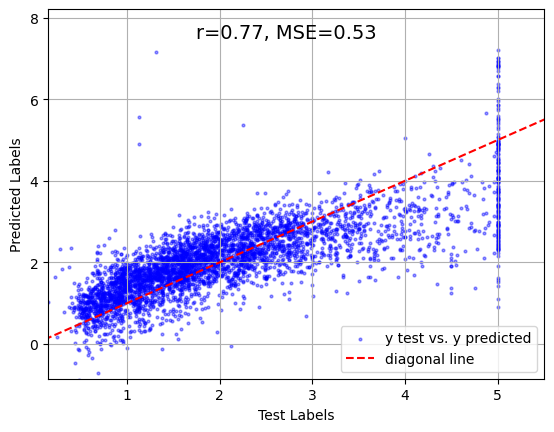

In [65]:
# Plotting r and MSE
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, color='blue', label='y test vs. y predicted', alpha=0.4, s=4)
#ax.plot(x, y2, c='purple', label="y'(x)")
ax.plot(np.linspace(0, len(y_test), len(y_test)), np.linspace(0, len(y_pred), len(y_pred)), color='r', ls='--', label='diagonal line')
ax.set_xlim(min(y_test), max(y_test)+0.5)
ax.set_ylim(min(y_test)-1, max(y_pred)+1)

ax.set_xlabel("Test Labels")
ax.set_ylabel("Predicted Labels")
ax.text(1.75, 7.5, f'r={y_r:.2f}, MSE={y_mse:.2f}', fontsize=14)

ax.legend()
ax.grid(True)
plt.show()